Loading dataset...
Dataset loaded with shape: (1488, 5)
Selecting relevant columns (TOTALDEMAND and RRP)...
Data after column selection:
   TOTALDEMAND    RRP
0      6912.25  91.86
1      6745.63  88.83
2      6466.06  73.62
3      6279.80  71.49
4      6177.31  69.27
Converting TOTALDEMAND and RRP to numeric...
Null values in columns after conversion:
TOTALDEMAND    0
RRP            0
dtype: int64
Handling missing values using forward fill...
Missing values after forward fill:
TOTALDEMAND    0
RRP            0
dtype: int64
Calculating rolling averages for TOTALDEMAND and RRP...
Rolling averages calculated.
Plotting TOTALDEMAND and RRP...


C:\Users\pavit\AppData\Local\Temp\ipykernel_5844\288907334.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


<Axes: >

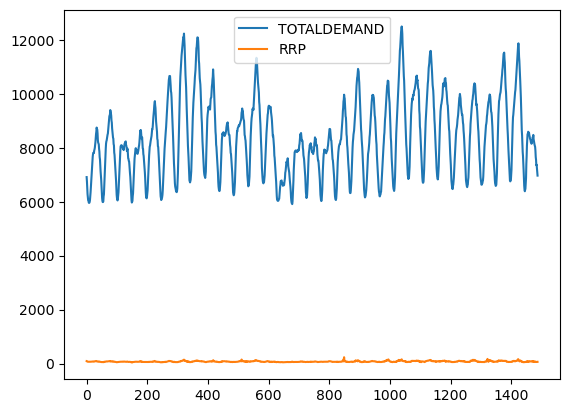

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
print("Loading dataset...")
data = pd.read_csv("C:/Users/pavit/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv")
print(f"Dataset loaded with shape: {data.shape}")

# Step 2: Select relevant columns
print("Selecting relevant columns (TOTALDEMAND and RRP)...")
data = data[['TOTALDEMAND', 'RRP']]
print(f"Data after column selection:\n{data.head()}")

# Step 3: Convert columns to numeric
print("Converting TOTALDEMAND and RRP to numeric...")
data['TOTALDEMAND'] = pd.to_numeric(data['TOTALDEMAND'], errors='coerce')
data['RRP'] = pd.to_numeric(data['RRP'], errors='coerce')
print("Null values in columns after conversion:")
print(data.isnull().sum())

# Step 4: Handle missing values
print("Handling missing values using forward fill...")
data = data.fillna(method='ffill')
print("Missing values after forward fill:")
print(data.isnull().sum())

# Step 5: Calculate rolling averages
print("Calculating rolling averages for TOTALDEMAND and RRP...")
data['TOTALDEM_rolling_avg'] = data['TOTALDEMAND'].rolling(window=7).mean()
data['RRP_rolling_avg'] = data['RRP'].rolling(window=7).mean()
print("Rolling averages calculated.")

# Step 6: Plot TOTALDEMAND and RRP
print("Plotting TOTALDEMAND and RRP...")
data[['TOTALDEMAND', 'RRP']].plot()


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Reload the dataset
print("Reloading dataset...")
data = pd.read_csv("C:/Users/pavit/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv")
data = data[['TOTALDEMAND', 'RRP']]
print("Selecting relevant columns (TOTALDEMAND and RRP)...")
data['TOTALDEMAND'] = pd.to_numeric(data['TOTALDEMAND'], errors='coerce')
data['RRP'] = pd.to_numeric(data['RRP'], errors='coerce')
data = data.fillna(method='ffill')
print("Dataset reloaded and missing values handled.")

# Function to remove outliers
def remove_outliers(df, column):
    print(f"Removing outliers from column: {column}...")
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Outliers removed from {column}. Data shape: {cleaned_df.shape}")
    return cleaned_df

# Step 2: Remove outliers
data = remove_outliers(data, 'TOTALDEMAND')
data = remove_outliers(data, 'RRP')

# Step 3: Remove duplicates
print("Removing duplicate rows...")
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

# Step 4: Save cleaned data to a CSV file
print("Saving cleaned data to 'cleaned_price_demand_data.csv'...")
data.to_csv('cleaned_price_demand_data.csv', index=False)
print("Cleaned data saved.")

# Step 5: Load cleaned data and scale features
print("Loading cleaned data and scaling features...")
data = pd.read_csv('cleaned_price_demand_data.csv')
scaler = MinMaxScaler()
data[['TOTALDEMAND_scaled', 'RRP_scaled']] = scaler.fit_transform(data[['TOTALDEMAND', 'RRP']])
print("Features scaled successfully.")

# Step 6: Create lagged features
print("Creating lagged features...")
data['TOTALDEMAND_lag_1'] = data['TOTALDEMAND'].shift(1)
data['RRP_lag_1'] = data['RRP'].shift(1)
data['TOTALDEMAND_lag_7'] = data['TOTALDEMAND'].shift(7)
data['RRP_lag_7'] = data['RRP'].shift(7)
print("Lagged features created.")

# Step 7: Split data into training and testing sets
print("Splitting data into training and testing sets...")
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Step 8: Save preprocessed data to CSV files
print("Saving training and testing data to CSV files...")
train_data.to_csv('train_price_demand_data.csv', index=False)
test_data.to_csv('test_price_demand_data.csv', index=False)
print("Training and testing data saved.")

print("\nData Cleaning and Preprocessing Completed.")


Reloading dataset...
Selecting relevant columns (TOTALDEMAND and RRP)...
Dataset reloaded and missing values handled.
Removing outliers from column: TOTALDEMAND...
Outliers removed from TOTALDEMAND. Data shape: (1488, 2)
Removing outliers from column: RRP...
Outliers removed from RRP. Data shape: (1455, 2)
Removing duplicate rows...
Data shape after removing duplicates: (1455, 2)
Saving cleaned data to 'cleaned_price_demand_data.csv'...
Cleaned data saved.
Loading cleaned data and scaling features...
Features scaled successfully.
Creating lagged features...
Lagged features created.
Splitting data into training and testing sets...
Training data shape: (1164, 8)
Testing data shape: (291, 8)
Saving training and testing data to CSV files...
Training and testing data saved.

Data Cleaning and Preprocessing Completed.


C:\Users\pavit\AppData\Local\Temp\ipykernel_5844\360550304.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


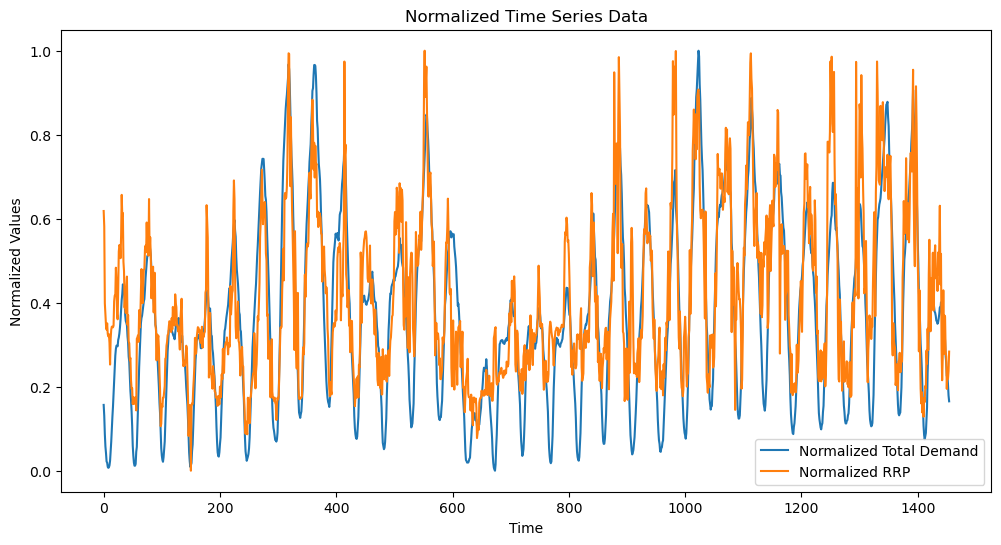

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['TOTALDEMAND_scaled'], label='Normalized Total Demand')
plt.plot(data['RRP_scaled'], label='Normalized RRP')
plt.title('Normalized Time Series Data')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()